# <b>__ASSIGNMENT 1__</b>

# <b>__NANFURI REGINALD YELE-ANG__</b>

# __3512322__

# __20949903__

***PRECIPITATION MEASUREMENT OVER 250mm FOR GHANA*** <br />
***OVER A 10 YEAR PERIOD, THUS 2010-2019.***

In [37]:
#importing libarries for manipulation
import xarray as xr
#all workable formats but with updated names should be ignored and run 
from warnings import filterwarnings
filterwarnings('ignore')
# Import Matplotlib
import numpy as np

In [3]:
glock = xr.open_dataset('Africa_cru_data.nc')
glock

<xarray.Dataset>
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [4]:
#selection of wanted data variable 
opp=glock['pre']
opp

<xarray.DataArray 'pre' (time: 1440, lat: 146, lon: 150)>
[31536000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [5]:
#checking for shape size
opp.shape

(1440, 146, 150)

In [14]:
#ghana_10yrs = opp.sel(time=slice('2010', '2019'))
#ghana_10yrs

In [15]:
#ghana_ds = opp.sel(lon=slice(-3.5, 1.5), lat=slice(4.5, 11.5))

In [13]:
crip_fildata = opp.sel(lon=slice(-3.5, 1.5), lat=slice(4.5, 11.5), time=slice('2010', '2019'))
crip_fildata

<xarray.DataArray 'pre' (time: 120, lat: 14, lon: 10)>
[16800 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 2010-01-16 2010-02-15 ... 2019-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [31]:
#grouping and summing precipitation for the total 10 years
annual_precip = crip_fildata.groupby('time.year').sum(dim='time')
annual_precip

<xarray.DataArray 'pre' (year: 10, lat: 14, lon: 10)>
array([[[   0.     , 1814.3    , 1770.8    , ...,    0.     ,
            0.     ,    0.     ],
        [1901.6    , 1844.1001 , 1745.7    , ...,    0.     ,
            0.     ,    0.     ],
        [1772.     , 1732.5001 , 1656.9001 , ..., 1211.9    ,
         1673.3998 ,    0.     ],
        ...,
        [1141.2999 , 1076.     , 1046.5    , ..., 1167.0001 ,
         1177.9    , 1203.4    ],
        [1100.9999 , 1076.     , 1044.7001 , ..., 1060.5    ,
         1036.1001 , 1055.4    ],
        [1073.9999 , 1053.2    , 1035.8    , ...,  963.2    ,
          952.00006,  931.80005]],

       [[   0.     , 1395.9    , 1388.2001 , ...,    0.     ,
            0.     ,    0.     ],
        [1517.0002 , 1475.6    , 1417.5    , ...,    0.     ,
            0.     ,    0.     ],
        [1424.7001 , 1398.9999 , 1358.5001 , ..., 1014.80005,
         1341.2001 ,    0.     ],
...
        [1245.6001 , 1200.3999 , 1184.2    , ..., 1125.2    ,
         1114.7001 , 1161.     ],
        [1176.5001 , 1165.5    , 1152.6    , ..., 1029.3    ,
         1015.9    , 1040.8    ],
        [1109.1    , 1105.1001 , 1080.1001 , ...,  964.9001 ,
          914.5    ,  922.39996]],

       [[   0.     , 1558.7    , 1532.8    , ...,    0.     ,
            0.     ,    0.     ],
        [1735.5    , 1685.6    , 1601.1998 , ...,    0.     ,
            0.     ,    0.     ],
        [1630.4001 , 1598.2999 , 1535.6    , ..., 1332.     ,
         1837.8999 ,    0.     ],
        ...,
        [1332.7    , 1290.7999 , 1271.3    , ..., 1194.6    ,
         1194.2    , 1239.9    ],
        [1257.2001 , 1241.4    , 1216.7    , ..., 1090.8    ,
         1065.7    , 1081.     ],
        [1181.1    , 1157.5    , 1139.9    , ...,  974.6    ,
          941.2999 ,  953.8    ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * year     (year) int64 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [39]:
# Count the number of time steps with precipitation above 250 mm
crip_fildata = (crip_fildata.where(crip_fildata > 250)).count(dim='time')
crip_fildata


<xarray.DataArray 'pre' (lat: 14, lon: 10)>
array([[ 0, 12, 10, 10,  9,  0,  0,  0,  0,  0],
       [14, 11, 10,  8,  7,  5,  6,  0,  0,  0],
       [11, 10,  9,  7,  5,  1,  1,  2,  7,  0],
       [ 6,  7,  5,  1,  1,  1,  3,  3,  3,  3],
       [ 1,  1,  1,  1,  1,  2,  3,  4,  4,  4],
       [ 1,  1,  1,  1,  0,  2,  3,  5,  6,  3],
       [ 0,  1,  0,  1,  1,  3,  4,  5,  5,  2],
       [ 2,  2,  2,  1,  1,  2,  3,  5,  6,  3],
       [ 2,  2,  3,  2,  1,  2,  4,  8, 10,  8],
       [ 3,  2,  2,  1,  0,  3,  6,  8,  9,  9],
       [ 4,  4,  1,  1,  3,  5,  7,  7,  8, 10],
       [ 7,  6,  4,  4,  4,  3,  5,  7,  6,  7],
       [ 9,  7,  6,  5,  6,  5,  6,  6,  6,  6],
       [10,  9,  7,  7,  7,  7,  5,  5,  3,  3]])
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25

In [36]:
print(crip_fildata.coords)

Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 2010-01-16 2010-02-15 ... 2019-12-16


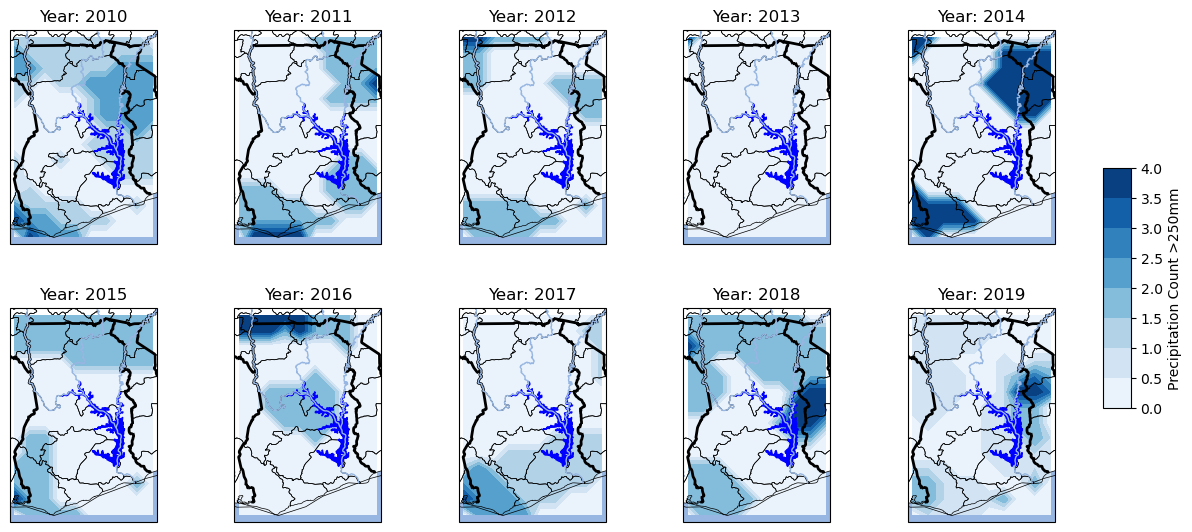

In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create 10 subplots (2 rows, 5 columns)
fig, ax = plt.subplots(2, 5, figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten() # Flatten for easy looping


# Group data by year
oblock = list(crip_fildata.groupby('time.year'))

for i in range(10):
    year, data = oblock[i]  # Extract year and corresponding data

    # Add map features
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS, linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)

    # Set map extent (focus on Ghana)
    ax[i].set_extent([-3.4, 1.4, 4.5, 11.5])

    # Plot precipitation above 250mm
    cb = ax[i].contourf(data.lon, data.lat, data.where(crip_fildata > 250).count(dim='time'),
                         cmap="Blues", transform=ccrs.PlateCarree()) # Count occurrences >250mm
 # Use Blues colormap for precipitation
    ax[i].set_title(f'Year: {year}')

# Add a single color bar
color_bar = fig.add_axes([0.92, 0.3, 0.02, 0.4])
fig.colorbar(cb, cax=color_bar, label="Precipitation Count >250mm") 

# Adjust subplot spacing
fig.subplots_adjust(wspace=0.2, hspace=0.3, top=0.93)

plt.show()


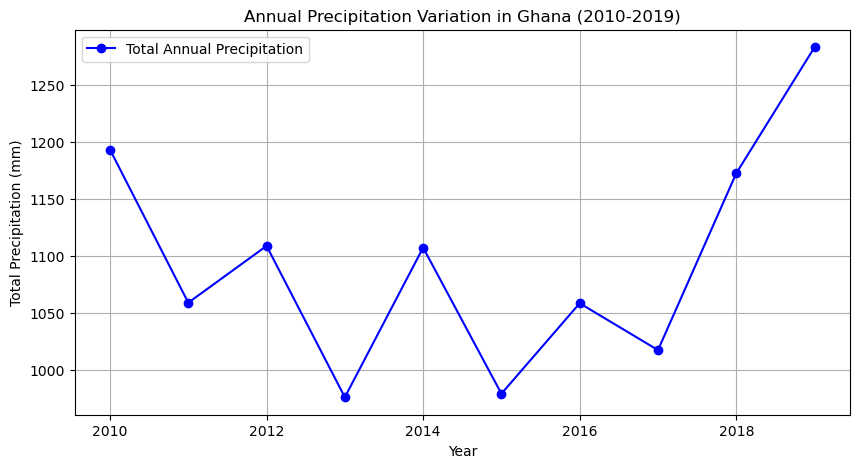

In [22]:
import matplotlib.pyplot as plt

# Compute total annual precipitation
annual_precip = crip_fildata.groupby('time.year').sum(dim='time')

# Plot
plt.figure(figsize=(10, 5))
annual_precip.mean(dim=['lat', 'lon']).plot(marker='o', color='b', label='Total Annual Precipitation')
plt.title('Annual Precipitation Variation in Ghana (2010-2019)')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.legend()
plt.grid()
plt.show()
